# Boston DATA : 회귀분석을 이용한 주택값 예측
## 1. 데이터 확인

In [6]:
from sklearn import datasets
boston_house_prices=datasets.load_boston()
print(boston_house_prices.keys())#전체 키값
print(boston_house_prices.data.shape)#data 전체 행, 열길이
print(boston_house_prices.feature_names)#컬럼 이름

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 2. 데이터 DataFrame 형태로

In [8]:
import pandas as pd
data=pd.DataFrame(boston_house_prices.data)
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


## 3. column 명 추가

In [10]:
data.columns=boston_house_prices.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [18]:
boston_house_prices.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## 4. target (주택 값) 추가 

In [11]:
data['Price']=boston_house_prices.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## 5. 상관관계 파악 : corr()

In [13]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 5.1 상관관계 그래프 : heatmap, scatter

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

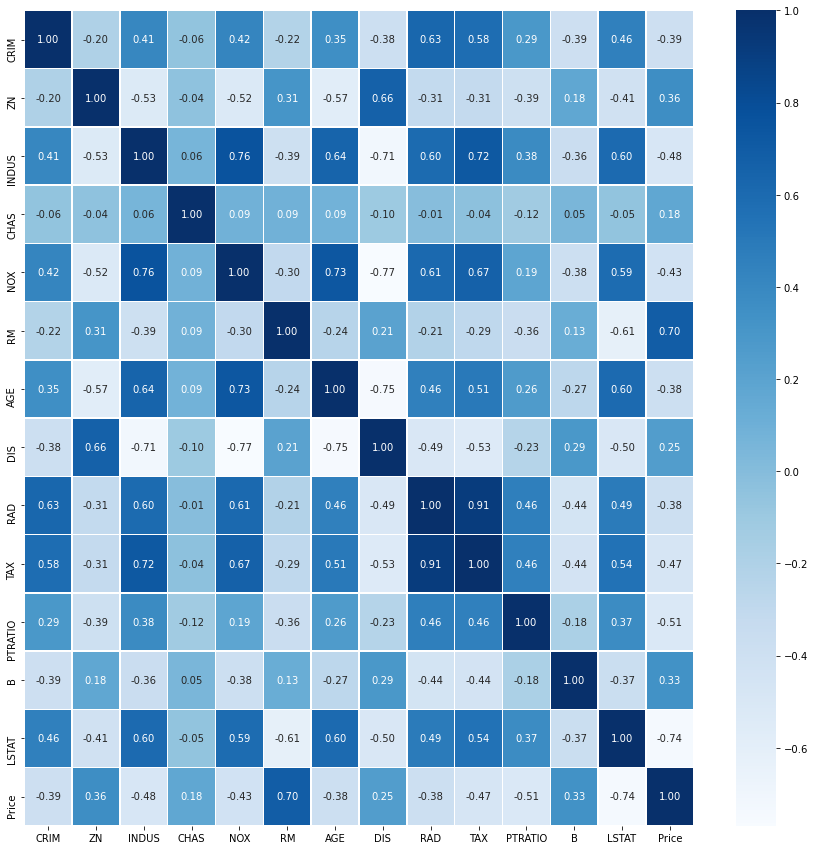

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',linewidths=.5,cmap='Blues')
#변수 많을때는 그냥 색만 보고 찍는게 좋음

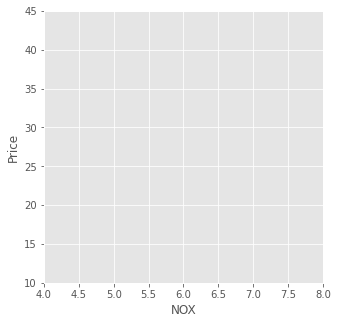

In [41]:
data.plot(kind='scatter',x="
          ",y="Price",figsize=(5,5),color='black',xlim=(,),ylim=(,))

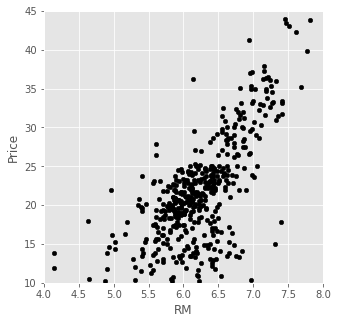

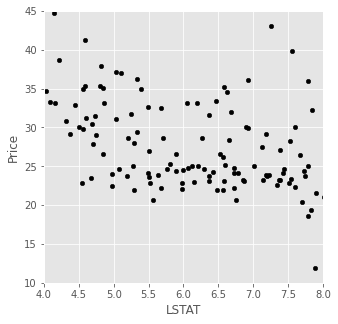

In [32]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

data.plot(kind='scatter',x="RM",y="Price",figsize=(5,5),color='black',xlim=(4,8),ylim=(10,45))
data.plot(kind='scatter',x="LSTAT",y="Price",figsize=(5,5),color='black',xlim=(4,8),ylim=(10,45))

## 6. 회귀 분석 : y절편, 기울기

In [22]:
from sklearn import linear_model

In [23]:
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['RM']),y=data['Price'])#모델에 필요한 두 변수 전달
prediction =linear_regression.predict(X=pd.DataFrame(data['RM']))
print('a value:',linear_regression.intercept_)#y절편
print('b value:',linear_regression.coef_)#기울기

a value: -34.67062077643857
b value: [9.10210898]


## 7. 오차 (실제값-예측값) , R_squared 

In [24]:
residuals=data['Price']-prediction #오차: 실제값-예측값
residuals.describe()

count    5.060000e+02
mean     2.134437e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [26]:
SSE=(residuals**2).sum()
SST=((data['Price']-data['Price'].mean())**2).sum()
R_squared=1-(SSE/SST)#적합도 검증 1에 가까울수록 좋음
print('R_squared: ',R_squared)

R_squared:  0.48352545599133423


## 8. 그래프: 산점도에 회귀선 추가

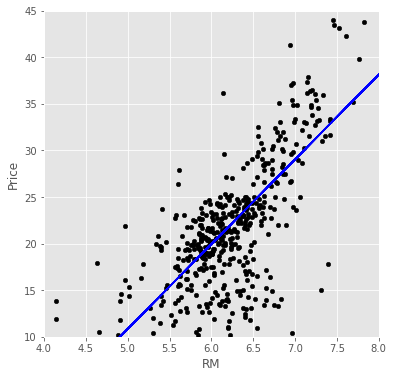

In [42]:
data.plot(kind='scatter',x='RM',y='Price',figsize=(6,6),color='black',xlim=(4,8),ylim=(10,45))
#kind 옵션 설명
# https://datascienceschool.net/view-notebook/372443a5d90a46429c6459bba8b4342c/ 
plt.plot(data['RM'],prediction,color='b')

In [46]:
import numpy as np

In [49]:
X=np.arange(20).reshape(10,2)
# y=np.arage(10)

print(X)


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]



In [51]:
y=np.arange(10)
print(y)

[0 1 2 3 4 5 6 7 8 9]


## 9. 데이터 분할 : train,test

In [52]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=False,random_state=1004)

In [59]:
print('X train shape : ',X_train.shape)
print('X test shape : ',X_test.shape)
print('y train shape : ',y_train.shape)
print('y test shape : ',y_test.shape)

print('X train shape :'' X_train)
print('X train shape : ',X_test)
print('X train shape : ',y_train)
print('X train shape : ',X_test)


X train shape :  (6, 2)
X test shape :  (4, 2)
y train shape :  (6,)
y test shape :  (4,)
X train shape : [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
X train shape :  [[12 13]
 [14 15]
 [16 17]
 [18 19]]
X train shape :  [0 1 2 3 4 5]
X train shape :  [[12 13]
 [14 15]
 [16 17]
 [18 19]]


In [67]:
from sklearn.datasets import load_boston
import pandas as pd
boston =load_boston()
dfX=pd.DataFrame(boston.data,columns=boston.feature_names)
dfy=pd.DataFrame(boston.target,columns=['MEDV'])
boston_df=pd.concat([dfX,dfy],axis=1)

print('train shap:',boston_df.shape)

train shap: (506, 14)


### 전체변수 분할

In [68]:
#전체변수 14
df_train,df_test= train_test_split(boston_df,test_size=0.3,random_state=0)
df_train.shape,df_test.shape

((354, 14), (152, 14))

### x, y따로 분할

In [70]:
#x따로 y따로
X_train,X_test,y_train,y_test=train_test_split(dfX,dfy,test_size=0.3,shuffle=False,random_state=0)
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((354, 13), (354, 1), (152, 13), (152, 1))

In [74]:
X_train,X_test,y_train,y_test=train_test_split(dfX,dfy,test_size=0.3,shuffle=True,random_state=0)
X_train, y_train,X_test,y_test

(        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
 141  1.62864   0.0  21.89   0.0  0.624  5.019  100.0  1.4394  4.0  437.0     21.2  396.90  34.41
 272  0.11460  20.0   6.96   0.0  0.464  6.538   58.7  3.9175  3.0  223.0     18.6  394.96   7.73
 135  0.55778   0.0  21.89   0.0  0.624  6.335   98.2  2.1107  4.0  437.0     21.2  394.67  16.96
 298  0.06466  70.0   2.24   0.0  0.400  6.345   20.1  7.8278  5.0  358.0     14.8  368.24   4.97
 122  0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869  2.0  188.0     19.1  378.09  17.93
 ..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...      ...     ...    ...
 323  0.28392   0.0   7.38   0.0  0.493  5.708   74.3  4.7211  5.0  287.0     19.6  391.13  11.74
 192  0.08664  45.0   3.44   0.0  0.437  7.178   26.3  6.4798  5.0  398.0     15.2  390.49   2.87
 117  0.15098   0.0  10.01   0.0  0.547  6.021   82.6  2.7474  6.0  432.0     17.8  394.51  10.30
 47   0.22927   0.0 

In [75]:
df_train,df_test= train_test_split(boston_df,test_size=0.3,shuffle=True,random_state=0)
df_train,df_test

(        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
 141  1.62864   0.0  21.89   0.0  0.624  5.019  100.0  1.4394  4.0  437.0     21.2  396.90  34.41  14.4
 272  0.11460  20.0   6.96   0.0  0.464  6.538   58.7  3.9175  3.0  223.0     18.6  394.96   7.73  24.4
 135  0.55778   0.0  21.89   0.0  0.624  6.335   98.2  2.1107  4.0  437.0     21.2  394.67  16.96  18.1
 298  0.06466  70.0   2.24   0.0  0.400  6.345   20.1  7.8278  5.0  358.0     14.8  368.24   4.97  22.5
 122  0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869  2.0  188.0     19.1  378.09  17.93  20.5
 ..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...      ...     ...    ...   ...
 323  0.28392   0.0   7.38   0.0  0.493  5.708   74.3  4.7211  5.0  287.0     19.6  391.13  11.74  18.5
 192  0.08664  45.0   3.44   0.0  0.437  7.178   26.3  6.4798  5.0  398.0     15.2  390.49   2.87  36.4
 117  0.15098   0.0  10.01   0.0  0.547  6.021   82.6  2.7474  6

In [79]:
X1_train,X1_valid,y1_train,y1_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X1_train.shape,y1_train.shape,X1_valid.shape,y1_valid.shape

((283, 13), (283, 1), (71, 13), (71, 1))

# 검증
- mean_squared_error(실제값y,예측값y^)

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=mean_squared_error(data['Price'],prediction)#y,y^
print(mse)
rmse=sqrt(mse)
print(rmse)

43.60055177116956
6.603071389222561


# 전처리 : 결측값 제거

In [83]:
import pandas as pd
df = pd.DataFrame(data={'a':[1,2,3,None],'b':[4,5,None,6],'c':[None,None,7,8]})
print(df)

     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0


In [84]:
df_0=df.fillna(0)
print(df_0)

     a    b    c
0  1.0  4.0  0.0
1  2.0  5.0  0.0
2  3.0  0.0  7.0
3  0.0  6.0  8.0


In [85]:
df_missing=df.fillna('지니')#missing
print(df_missing)

    a   b   c
0   1   4  지니
1   2   5  지니
2   3  지니   7
3  지니   6   8


In [87]:
df1=df.fillna(method='bfill')#행을 보고 가져오기
df2=df.fillna(method='backfill')
print(df)
print(df1)#df1==df2
print(df2)

     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  7.0
1  2.0  5.0  7.0
2  3.0  6.0  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  7.0
1  2.0  5.0  7.0
2  3.0  6.0  7.0
3  NaN  6.0  8.0


In [89]:
a=df.fillna(df.mean())
b=df.where(pd.notnull(df),df.mean(),axis='columns')

print(df)

print(a)
print(b)

     a    b    c
0  1.0  4.0  NaN
1  2.0  5.0  NaN
2  3.0  NaN  7.0
3  NaN  6.0  8.0
     a    b    c
0  1.0  4.0  7.5
1  2.0  5.0  7.5
2  3.0  5.0  7.0
3  2.0  6.0  8.0
     a    b    c
0  1.0  4.0  7.5
1  2.0  5.0  7.5
2  3.0  5.0  7.0
3  2.0  6.0  8.0
